In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
import certifi
import ssl
import geopy.geocoders
ctx = ssl.create_default_context(cafile=certifi.where())
geopy.geocoders.options.default_ssl_context = ctx
from geopy.geocoders import GoogleV3

In [463]:
def get_file_contents(filename):
    """ Given a filename,
        return the contents of that file
    """
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)
        
secret_api_key = get_file_contents('secret.py')


# Dear user, please enter a San Francisco address below:
By entering an address and running the cells below, you will get a prediction of the average weekly rides that would be taken from your proposed station.  You will also get a normalized number of rides predicted, for comparison to other stations.  Basically, above 1.0 is more than average and below 1.0 is less than average.  From that you get a recommendation of whether your proposed address is a good location for a new bike station. You will also see a map of the current stations and their usage and your proposed new location.

In [464]:
address = "1800 Montgomery St, San Francisco, CA 94111"
#example: address = "1800 Montgomery St, San Francisco, CA 94111"

In [502]:
geolocator = GoogleV3(api_key=secret_api_key)
location = geolocator.geocode(address, timeout=10)
print(location.address)
print((location.latitude, location.longitude))
proposed_station = [location.latitude, location.longitude]
print('Calculating...')
coordinate_predictions = coordinates_to_predictions(proposed_station)

1800 Montgomery St, San Francisco, CA 94111, USA
(37.80599309999999, -122.4051806)
Calculating...
The predicted number of trips per week, starting at this location, is: 612
The normalized weekly trip count is:  3.58556842726421
The trip count is more than average, this may be a good location.


In [496]:
import folium

plt.figure(figsize=(15,10))
m = folium.Map(location=[37.786375, -122.404904], tiles='Stamen Toner', zoom_start=13)

mapping_data.apply(lambda row:folium.CircleMarker(location=[row["start_station_latitude"], \
            row["start_station_longitude"]], radius=7,\
            color=row['marker_color'], fill=True, fill_opacity=0.8\
            ).add_to(m), axis=1)
legend_html =   '''
                <div style="position: fixed; 
                            bottom: 50px; right: 50px; width: 150px; height: 130px; 
                            border:2px solid grey; z-index:9999; font-size:14px;
                            background-color:lightgrey;
                            ">&nbsp; <b>Number of Trips:</b><br>
                              &nbsp; <i class="fa fa-circle" style="color:yellow"></i> Low &nbsp; <br>
                              &nbsp; <i class="fa fa-circle" style="color:orange"></i> Below Average &nbsp; <br>
                              &nbsp; <i class="fa fa-circle" style="color:red"></i> Above Average &nbsp; <br>
                              &nbsp; <i class="fa fa-circle" style="color:darkred"></i> High &nbsp; <br>
                              &nbsp; <i class="fa fa-circle" style="color:blue"></i> Proposed station &nbsp; <br>
                </div>
                </div>
                </div>
                ''' 

m.get_root().html.add_child(folium.Element(legend_html))
m


<Figure size 1080x720 with 0 Axes>

In case the html map does not render properly, here is a png snapshot of what it should look like:

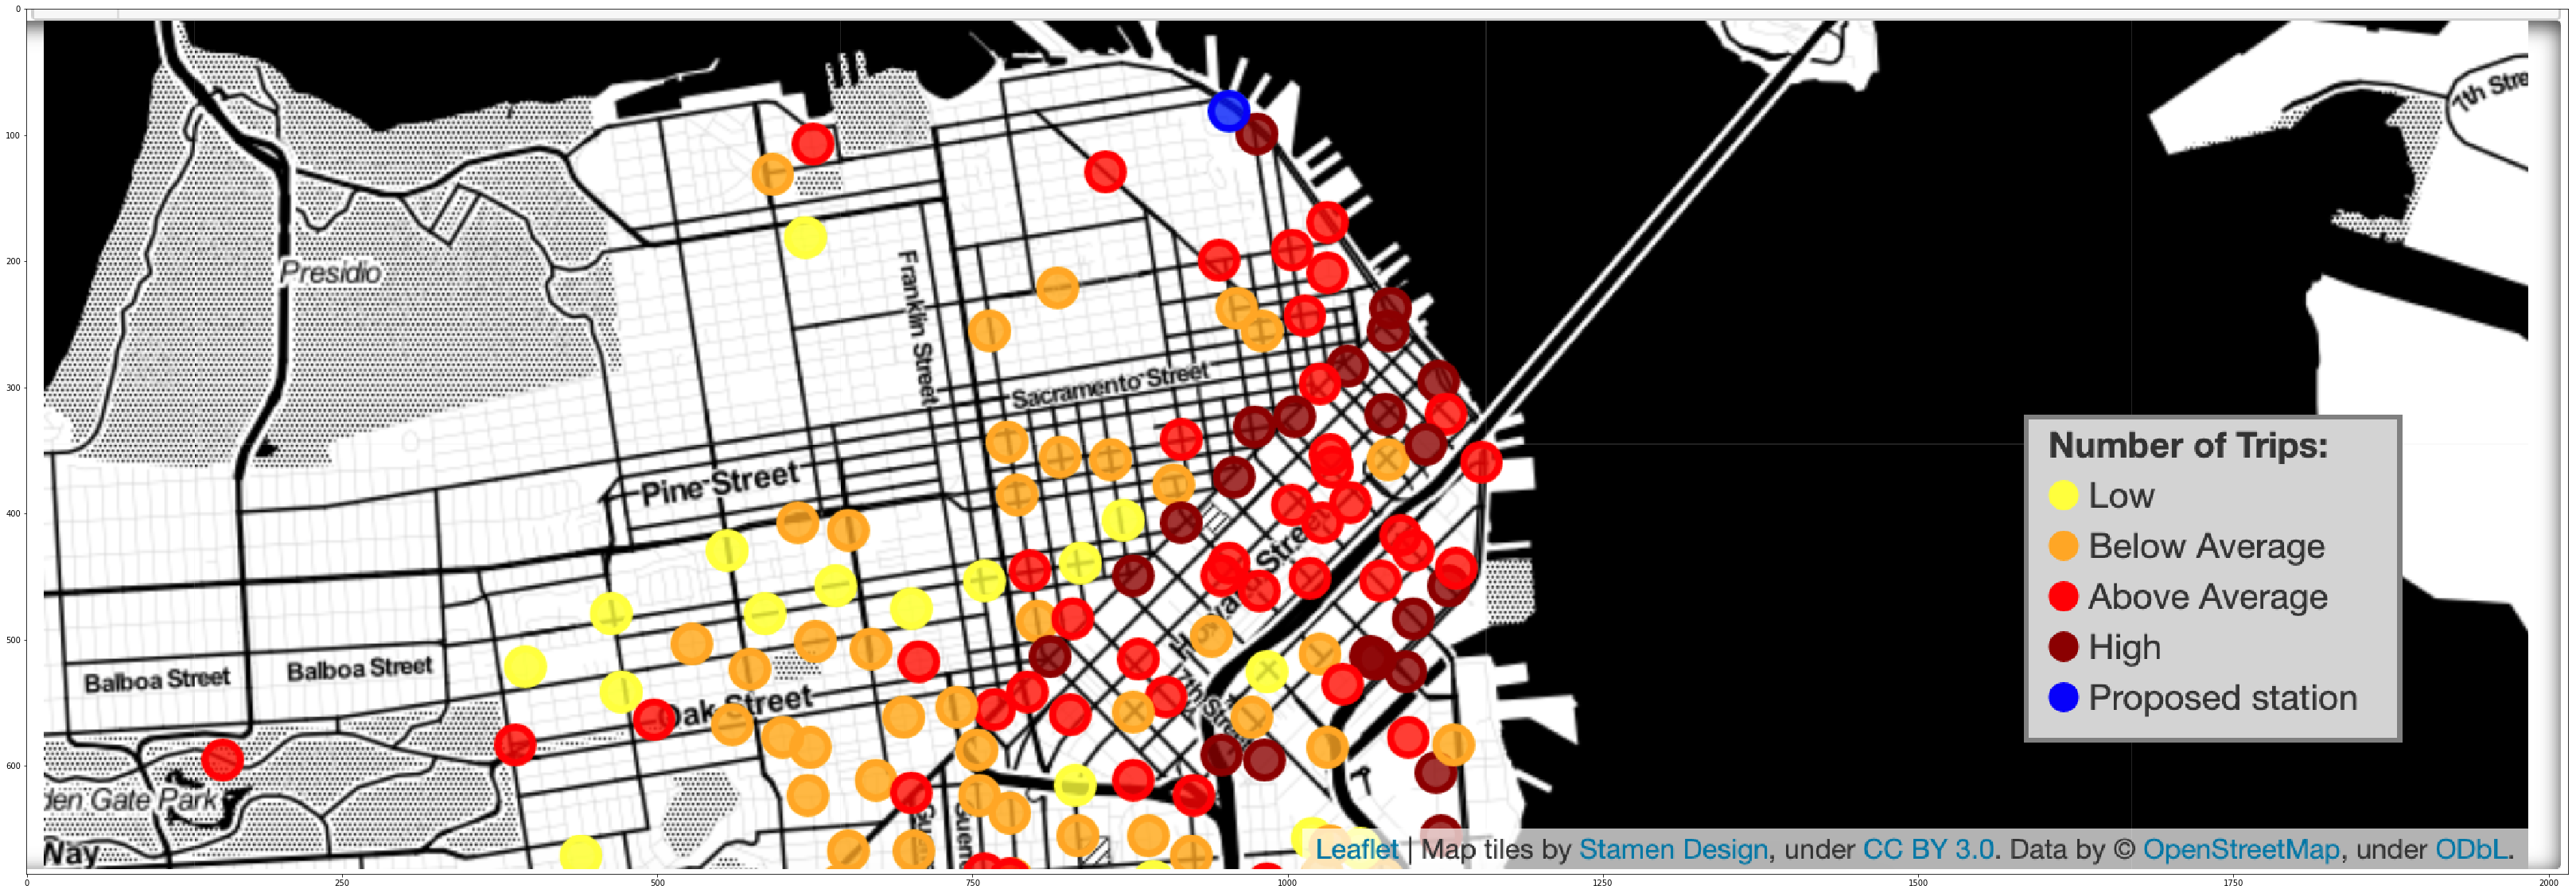

In [477]:
import matplotlib.image as mpimg

plt.figure(figsize = (100,20))
img=mpimg.imread('lyft_stations_screen_shot.png')
imgplot = plt.imshow(img)


### That was the final product. Now let's back up and show how we got to this point.

# 1. Introduction and Motivation

Bike shares are great, but you may be wondering why there isn't a station near your house or a busy part of town.  You may want to propose a new station.  A simple way to evaluate whether your proposed station will be viable, and have enough users, is to compare to existing stations.  Since bike share bikes are often used for getting to or from public transit, the distance to BART and Muni will also be considered.

The Lyft Baywheels bike share provides data for trips taken using their bikes.  The data includes the station names, locations, and number of trips started and finished there.  From this data I calculated the number of trips per station per week and found which stations are more or less popular.  I also calculated how far the stations are from public transit.  I fed this into a machine learning model to predict the popularity of a proposed station location.


# 2.  Let's read in all the csv's and append them into one dataframe

### The website for getting data is the Lyft Baywheels site:
https://s3.amazonaws.com/baywheels-data/index.html

In [5]:
df_201907= pd.read_csv('201907-baywheels-tripdata.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_201906= pd.read_csv('201906-baywheels-tripdata.csv')

In [8]:
df_201905= pd.read_csv('201905-baywheels-tripdata.csv')

In [9]:
df_201904 = pd.read_csv('201904-fordgobike-tripdata.csv')

In [10]:
df_201903 = pd.read_csv('201903-fordgobike-tripdata.csv')

In [11]:
df_201902 = pd.read_csv('201902-fordgobike-tripdata.csv')

In [12]:
df_201901 = pd.read_csv('201901-fordgobike-tripdata.csv')

In [13]:
df_201812 = pd.read_csv('201812-fordgobike-tripdata.csv')

In [14]:
df_201811 = pd.read_csv('201811-fordgobike-tripdata.csv')

In [15]:
df_201810 = pd.read_csv('201810-fordgobike-tripdata.csv')

In [16]:
df_201809 = pd.read_csv('201809-fordgobike-tripdata.csv')

In [17]:
df_201808 = pd.read_csv('201808-fordgobike-tripdata.csv')

In [18]:
df_201807 = pd.read_csv('201807-fordgobike-tripdata.csv')

In [19]:
df_201806 = pd.read_csv('201806-fordgobike-tripdata.csv')

In [20]:
df_201805 = pd.read_csv('201805-fordgobike-tripdata.csv')

In [21]:
df_201804 = pd.read_csv('201804-fordgobike-tripdata.csv')

In [22]:
df_201803 = pd.read_csv('201803-fordgobike-tripdata.csv')

In [23]:
df_201802 = pd.read_csv('201802-fordgobike-tripdata.csv')

In [24]:
df_201801 = pd.read_csv('201801-fordgobike-tripdata.csv')

In [25]:
df_2017 = pd.read_csv('2017-fordgobike-tripdata.csv')

In [529]:
df = df_201907.append(df_201906, sort=True)
df = df.append(df_201905, sort=True)
df = df.append(df_201904, sort=True)
df = df.append(df_201903, sort=True)
df = df.append(df_201902, sort=True)
df = df.append(df_201901, sort=True)
df = df.append(df_201812, sort=True)
df = df.append(df_201811, sort=True)
df = df.append(df_201810, sort=True)
df = df.append(df_201809, sort=True)
df = df.append(df_201808, sort=True)
df = df.append(df_201807, sort=True)
df = df.append(df_201806, sort=True)
df = df.append(df_201805, sort=True)
df = df.append(df_201804, sort=True)
df = df.append(df_201803, sort=True)
df = df.append(df_201802, sort=True)
df = df.append(df_201801, sort=True)


In [530]:
df = df.append(df_2017, sort=True)

# 3.  Let's get some data for Muni and Bart station locations

I am assuming that the proximity to public transit makes the bike docking stations more popular.  

## 3.1  Muni stops

In [28]:
muni_stops = pd.read_csv('sfmta_transit/stops.txt')
muni_stops.head()

,stop_lat,stop_code,stop_lon,stop_url,stop_id,stop_desc,stop_name,location_type,zone_id
0,37.792357,14026,-122.421010,NaN,4026,NaN,Clay St & Polk St,0,NaN
1,37.793826,14027,-122.409591,NaN,4027,NaN,Clay St & Powell St,0,NaN
2,37.793653,14024,-122.410823,NaN,4024,NaN,Clay St & Mason St,0,NaN
3,37.794682,14025,-122.402770,NaN,4025,NaN,Clay St & Montgomery St,0,NaN
4,37.792526,14022,-122.419589,NaN,4022,NaN,Clay St & Larkin St,0,NaN


## 3.2  BART stops

In [29]:
bart= [[-122.27145,37.803768],[-122.419694,37.765062],[-122.268602,37.80835],\
      [-122.418143,37.75247],[-122.270062,37.852803],[-122.447506,37.721585],\
      [-122.126514,37.696924], [-122.075602,37.690746],[-122.414123,37.779732],\
      [-122.196869,37.753661],[-122.466233,37.684638],[-122.029095,37.973737],\
      [-122.469081,37.706121],[-122.268133,37.870104],[-122.316794,37.925086],\
      [-121.899179,37.701687],[-122.39702,37.792874],[-121.976608,37.557465],\
      [-122.224175,37.774836],[-122.433817,37.733064],[-122.087018,37.669723],\
      [-122.12463,37.893176],[-122.26518,37.797027],[-122.26704,37.829065],\
      [-122.386702,37.600271],[-122.401066,37.789405],[-122.28344,37.873967],\
      [-122.024653,38.003193],[-122.212191,37.713238],[-122.183791,37.878361],\
      [-122.056012,37.928468],[-121.945154,38.018914],[-122.298904,37.902632],\
      [-122.407974,37.784471],[-122.353099,37.936853],[-122.251371,37.844702],\
      [-122.160844,37.721947],[-122.416287,37.637761],[-122.392409,37.615966],\
      [-122.057189,37.634375],[-122.44396,37.664245],[-122.017388,37.59063],\
      [-121.939313,37.502171],[-122.067527,37.905522],[-121.92824,37.699756],\
      [-122.29514,37.804872],[-121.7799352782858,37.9952478246996],\
      [-121.8889731954402,38.01681081863409]]

In [30]:
bart = pd.DataFrame(bart)
bart.columns = ['long','lat']
bart.head()

,long,lat
0,-122.271450,37.803768
1,-122.419694,37.765062
2,-122.268602,37.808350
3,-122.418143,37.752470
4,-122.270062,37.852803


## 3.3  Calculating the distance of each stop from BART and Muni

In [481]:
from geopy.distance import geodesic

def distance_calc(origin, destination):
    
    return geodesic(origin, destination).miles


In [32]:
def bart_dist(df):
    station = (df.start_station_latitude, df.start_station_longitude)
    bart_df = list(zip(bart.lat, bart.long))
    
    distances = [distance_calc(station, entry) for entry in bart_df]
    return min(distances)

In [33]:
def muni_dist(df):
    station = (df.start_station_latitude, df.start_station_longitude)
    muni_df = list(zip(muni_stops.stop_lat, muni_stops.stop_lon))
    
    distances = [distance_calc(station, entry) for entry in muni_df]
    return min(distances)

### We need to filter for only San Francisco because proximity to BART and Muni is only valid here


Our original dataset includes the East Bay and San Jose, but we just want to look at San Francisco.  We want to be West of -122.368535 (less than) and North of 37.702170 (greater than)

In [181]:
df = df[df['start_station_latitude'] > 37.702170 ]

In [182]:
df = df[df['start_station_longitude'] < -122.368535]

### Dataframe of just the station id's, coordinates, and distances to BART and Muni
We can join this to other dataframes later, it avoids recalculating distances.

In [36]:
coords_only = df.groupby('start_station_id').agg({'start_station_latitude':'min','start_station_longitude':'min'})

In [482]:
coords_only['min_bart_dist'] = coords_only.apply(bart_dist, axis=1)
coords_only['min_muni_dist'] = coords_only.apply(muni_dist, axis=1)

# 4.  Let's look at some time data

In [531]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [532]:
df.set_index('start_time', inplace=True)

## 4.1  Weekly sampling

In [533]:
weekly = df.groupby('start_station_id').resample('W').count()

In [534]:
weekly = weekly[['bike_id']]

In [535]:
weekly.columns = ['trip_count']

In [536]:
weekly.head()

trip_count
start_station_id start_time            
3.0              2017-07-02         111
                 2017-07-09         191
                 2017-07-16         218
                 2017-07-23         346
                 2017-07-30         290

In [537]:
weekly.reset_index(inplace=True)

In [538]:
weekly['start_time'] = pd.to_datetime(weekly['start_time'])

In [539]:
weekly['month'] = weekly.start_time.dt.month
weekly['year'] = weekly.start_time.dt.year

Now joining the coordinate and distance data back to our weekly trip counts.

In [540]:
joined_weekly = weekly.join(coords_only, on='start_station_id', how='left')

In [541]:
joined_weekly.reset_index().head()

,index,start_station_id,start_time,trip_count,month,year,start_station_latitude,start_station_longitude,min_bart_dist,min_muni_dist
0,0,3.0,2017-07-02,111,7,2017,37.786375,-122.404904,0.213256,0.014029
1,1,3.0,2017-07-09,191,7,2017,37.786375,-122.404904,0.213256,0.014029
2,2,3.0,2017-07-16,218,7,2017,37.786375,-122.404904,0.213256,0.014029
3,3,3.0,2017-07-23,346,7,2017,37.786375,-122.404904,0.213256,0.014029
4,4,3.0,2017-07-30,290,7,2017,37.786375,-122.404904,0.213256,0.014029


## 4.2 Plotting weekly trips
Here let's average all the trips per station over the entire timeframe so we can put them on a map with one colored marker.

In [542]:
weekly_markers = joined_weekly.groupby('start_station_id')['trip_count'].mean()

In [543]:
weekly_markers = pd.DataFrame(weekly_markers)

In [544]:
weekly_markers['normalized_trip_count'] = weekly_markers.trip_count/ weekly_markers.trip_count.mean()

In [545]:
weekly_markers.normalized_trip_count.describe()

count    388.000000
mean       1.000000
std        1.116897
min        0.009584
25%        0.257491
50%        0.657130
75%        1.416971
max        6.946962
Name: normalized_trip_count, dtype: float64

In [546]:
weekly_markers['marker_color'] = weekly_markers['normalized_trip_count'].apply(color_selector)

In [547]:
weekly_markers.head()

,trip_count,normalized_trip_count,marker_color
start_station_id,,,
3.0,574.590909,5.506844,darkred
4.0,120.600000,1.155823,red
5.0,474.763636,4.550106,darkred
6.0,587.927273,5.634659,darkred
7.0,167.027778,1.600784,darkred


In [432]:
def color_selector(size):
    """This function assigns a color to station markers on the map.
    Based on the normalized number of trips from that station."""
    
    if size <0.5:
        color = 'yellow'
    elif size >0.5 and size < 1:
        color = 'orange'
    elif size >1 and size < 1.5:
        color = 'red'
    elif size > 1.5:
        color = 'darkred'
    else:
        color = 'black'
    return color

## 4.3  Weekly Trip Count Histogram

Text(0.5, 0, 'Weekly number of trips started at a particular station')

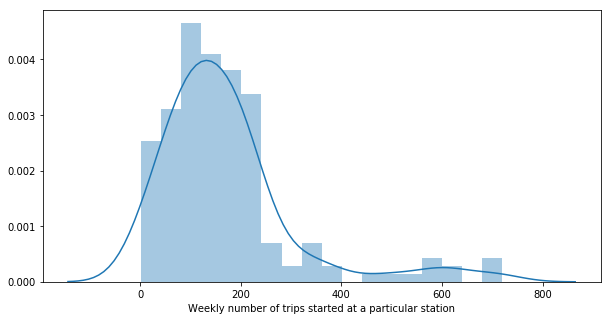

In [548]:
import numpy as np 
plt.figure(figsize=(10, 5))
sns.distplot(markers_joined['trip_count'])
plt.xlabel('Weekly number of trips started at a particular station')

## 4.4  Daily Sampling

Let's also look at daily sampling.  Perhaps knowing they day of the week can help us make a better model.

In [188]:
daily = df.groupby('start_station_id').resample('D').count()

In [189]:
daily = daily[['bike_id']]
daily.columns = ['trip_count']

In [190]:
daily.reset_index(inplace=True)

In [191]:
daily.head()

,start_station_id,start_time,trip_count
0,3.0,2017-06-29,22
1,3.0,2017-06-30,23
2,3.0,2017-07-01,27
3,3.0,2017-07-02,39
4,3.0,2017-07-03,28


In [192]:
daily['start_time'] = pd.to_datetime(daily['start_time'])

In [193]:
daily['month'] = daily.start_time.dt.month
daily['day'] = daily.start_time.dt.weekday_name
daily['year'] = daily.start_time.dt.year

In [194]:
daily.head(1)

,start_station_id,start_time,trip_count,month,day,year
0,3.0,2017-06-29,22,6,Thursday,2017


Now, joining the station coordinates and distances to transit back to the time data.

In [195]:
daily_coords = daily.join(coords_only, on='start_station_id', how='left')

In [196]:
daily_coords.head()

,start_station_id,start_time,trip_count,month,day,year,start_station_latitude,start_station_longitude,min_bart_dist,min_muni_dist
0,3.0,2017-06-29,22,6,Thursday,2017,37.786375,-122.404904,0.342934,0.022524
1,3.0,2017-06-30,23,6,Friday,2017,37.786375,-122.404904,0.342934,0.022524
2,3.0,2017-07-01,27,7,Saturday,2017,37.786375,-122.404904,0.342934,0.022524
3,3.0,2017-07-02,39,7,Sunday,2017,37.786375,-122.404904,0.342934,0.022524
4,3.0,2017-07-03,28,7,Monday,2017,37.786375,-122.404904,0.342934,0.022524


## 4.5  Daily Trip Count Histogram

Text(0.5, 0, 'Daily number of trips from a station')

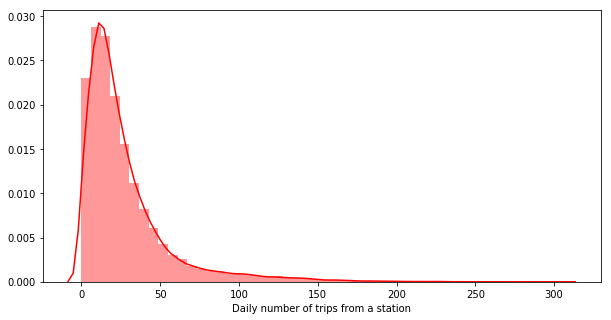

In [197]:
plt.figure(figsize=(10,5))
sns.distplot(daily_coords['trip_count'], color='red')
plt.xlabel('Daily number of trips from a station')

# 5.  Let's get into some machine learning
Let's build a model that takes into account the station coordinates, distance from public transit, and some time variable to predict station popularity.

It turns out that the weekly data was superior to daily data for training the model.  That is what is shown in this section.

The transformer below, will help us select which columns of the dataframe we want to feed into which part of the model.

In [140]:
import numpy as np
from sklearn import base

class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, columns):
        self.columns = columns  
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns].values
                    

## 5.1 Let's separate out the label (y value) data and separate out a test set

In [277]:
usage = joined_weekly['trip_count'].values
data = joined_weekly

In [278]:
from sklearn.utils import shuffle

data, usage = shuffle(data, usage)

In [279]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, usage, test_size=0.1, random_state=0)

## 5.2 Models that we'll be using:

- **K-nearest-neighbors:**
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.
- **Ridge regression:**
This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. 
- **Random forest regression:**
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [201]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

linreg = linear_model.Ridge()
knn = KNeighborsRegressor()
tree = RandomForestRegressor()

## 5.3 This is for clustering the coordinates:

In [280]:
from sklearn.pipeline import Pipeline

coord_pipe = Pipeline([('cst', ColumnSelectTransformer(['start_station_latitude', 'start_station_longitude' ])),
                       ('knn', KNeighborsRegressor())
                       ])

### Let's do some cross validation/ grid search to find the best hyperparameters:

In [281]:
from sklearn import model_selection 

gs_coord = model_selection.GridSearchCV(
    coord_pipe,
    {"knn__n_neighbors": range(10, 100)},
    cv=5)
gs_coord.fit(X_train, y_train) 
print (gs_coord.best_params_)

{'knn__n_neighbors': 37}


In [282]:
gs_coord.score(X_test, y_test)

0.7081739085071528

## 5.4 This is for the distance information:


In [514]:
dist_pipe = Pipeline([('cst', ColumnSelectTransformer(['min_bart_dist', 'min_muni_dist'])),
                      ('tree', RandomForestRegressor())
    ])

In [515]:
gs_dist = model_selection.GridSearchCV(
    dist_pipe,
    {"tree__n_estimators": [90, 140, 150, 160, 170]},
    cv=5)
gs_dist.fit(X_train, y_train)
print (gs_dist.best_params_)

{'tree__n_estimators': 150}


In [516]:
gs_dist.score(X_test, y_test)

0.7217002316330802

## 5.5 This is for the time series information:

In [523]:
from sklearn.preprocessing import OneHotEncoder

time_pipe = Pipeline([
                            ('cst',ColumnSelectTransformer(['year', 'month'])), 
                            ('ohe', OneHotEncoder(categories='auto')),
                            ('tree', RandomForestRegressor())
    ])

In [524]:
gs_time = model_selection.GridSearchCV(
    time_pipe,
    {"tree__n_estimators": [90, 140, 150, 160, 170]},
    cv=5)
gs_time.fit(X_train, y_train)
print (gs_time.best_params_)

{'tree__n_estimators': 160}


In [525]:
gs_time.score(X_test, y_test)

0.05905515969991437

While this prediction score of 6% may seem insignificant, when the time aspect of the prediction is removed the impact is actually closer to a 10% loss in accuracy. The month and year data is worth keeping.

## 5.6  Let's combine the time and spatial data into our final model:
Our previous estimators need to be converted to transformers.  They will all be combined in a feature union and fed into a new pipe with a linear estimator to weight the 3 models appropriately.

In [152]:
class EstimatorTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, estimator):
        self.estimator = estimator
    
    def fit(self, X, y):
        self.estimator.fit(X,y)
        return self
        
    def transform(self, X):
        result = self.estimator.predict(X)
        mid = np.array(result)
        final = mid.reshape(-1,1)
        return final

In [302]:
time_trans = EstimatorTransformer(gs_time)
dist_trans = EstimatorTransformer(gs_dist)
coord_trans = EstimatorTransformer(gs_coord)

In [506]:
from sklearn.pipeline import FeatureUnion

union = FeatureUnion([('time', time_trans),
                      ('space', space_trans),
                      ('coords', coord_trans)
    ])

### Here is the full model:

In [507]:
full_model_pipe = Pipeline([('union', union), ('ridge', Ridge(alpha=10))])
full_model_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('time',
                                                 EstimatorTransformer(estimator=GridSearchCV(cv=5,
                                                                                             error_score='raise-deprecating',
                                                                                             estimator=Pipeline(memory=None,
                                                                                                                steps=[('cst',
                                                                                                                        ColumnSelectTransformer(columns=['year',
                                                                                                                                                         'month'])),
                                                 

In [508]:
full_model_pipe.score(X_test, y_test)

0.8163848240868449

## 5.6  Let's put everything we've done above into one function:
This function will take coordinates for a proposed station and output a prediction.

In [526]:
def coordinates_to_predictions(coordinates):
    """Takes in a list of coordinates, makes dataframe, 
    calculates distances to public transit, predicts the avg number of trips per week,
    normalizes the prediction, prints out a prediction, and assigns a color to 
    the marker for placing on the map.
    """
    ######### Making sure that we are in SF ###
    if  (coordinates[0] <= 37.692174) or (coordinates[0] >= 37.807073):
        print('Your chosen address is not in San Francisco.  Please enter a valid address.')
        return None
    
    if  (coordinates[1] >= -122.351810) or (coordinates[1] <= -122.528495):
        print('Your chosen address is not in San Francisco.  Please enter a valid address.')
        return None
    
    ########## Making a dataframe ###########
    """This will fill in info for a hypothetical full year.  We will average over all
    the predictions at the end."""
    
    d_f = pd.DataFrame()
    month = list(range(1,13))
    year = [2019]*12
    d_f['year'] = year
    d_f['month'] = month
    d_f['start_station_latitude'] = coordinates[0]
    d_f['start_station_longitude'] = coordinates[1]
    
    ########## Calculating distance to public transit...###########
    d_f['min_muni_dist'] = d_f.apply(muni_dist, axis=1)
    d_f['min_bart_dist'] = d_f.apply(bart_dist, axis=1)
    
    ########### Predicting number of trips per week...####################
    prediction = full_model_pipe.predict(d_f)
    d_f['prediction'] = pd.Series(prediction)
    
    weekly_trip_mean = weekly_markers.trip_count.mean()
    d_f['normalized_trip_count'] = d_f.prediction/weekly_trip_mean
    
    ######## Printing out stuff for the user ############
    print("The predicted number of trips per week, starting at this location, is:", int(d_f.prediction.mean()))
    print("The normalized weekly trip count is: ", d_f.normalized_trip_count.mean())
    
    if d_f.normalized_trip_count.mean() < 1:
        print('The trip count is less than average, this may not be a good location.')
    else:
        print('The trip count is more than average, this may be a good location.')
    
    ### A Dataframe of averages will be returned ########
    d_f_avg = pd.DataFrame()
    d_f_avg['start_station_latitude'] = [coordinates[0]]
    d_f_avg['start_station_longitude'] = coordinates[1]
    d_f_avg['trip_count'] = d_f.prediction.mean()
    d_f_avg['normalized_trip_count'] = d_f.normalized_trip_count.mean()
    d_f_avg['marker_color'] = 'blue'
    d_f_avg['min_muni_dist'] = d_f.min_muni_dist.mean()
    d_f_avg['min_bart_dist'] = d_f.min_bart_dist.mean()
    
    return d_f_avg

# 6.  Using Prophet to look at a time series of one station
A slight side-track looking at a time series for just one station and using Prophet to predict future demand.  The analysis will look at the San Francisco Ferry Building.

In [433]:
from fbprophet import Prophet

In [434]:
stations = df.groupby('start_station_name')

In [435]:
ferry_building = stations.get_group('San Francisco Ferry Building (Harry Bridges Plaza)')

In [436]:
ferry_time = ferry_building.groupby('date')['date'].count()

In [437]:
ferry_time = pd.DataFrame(ferry_time)
ferry_time.head()
ferry_time['DS'] = ferry_time.index

In [438]:
ferry_time.columns = ['y','ds']

In [439]:
ferry_time.head()

,y,ds
date,,
2017-06-28,47,2017-06-28
2017-06-29,86,2017-06-29
2017-06-30,76,2017-06-30
2017-07-01,54,2017-07-01
2017-07-02,57,2017-07-02


In [489]:
m = Prophet(daily_seasonality=False)
m.fit(ferry_time)

In [490]:
future = m.make_future_dataframe(periods=365)


In [491]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1124,2020-07-26,34.218068,3.320309,66.697036
1125,2020-07-27,88.174987,53.355814,122.837820
1126,2020-07-28,96.632684,64.533279,126.674147
1127,2020-07-29,90.853974,57.605654,127.383945
1128,2020-07-30,96.245663,64.764603,128.532360


Text(0.5, 1.0, 'Trips started at the Ferry building')

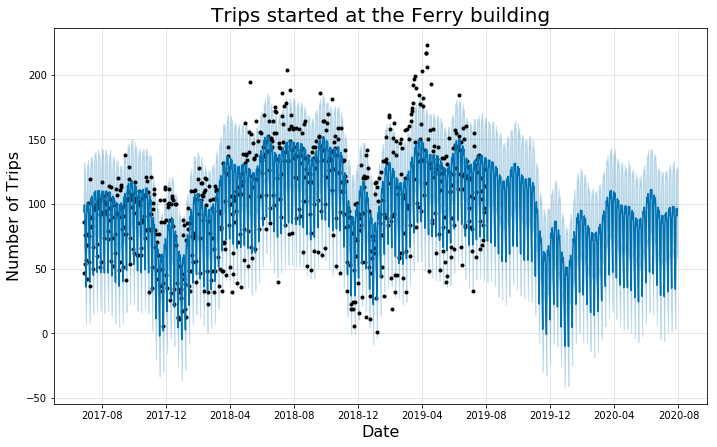

In [492]:
fig1 = m.plot(forecast)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Trips', fontsize=16)
plt.title('Trips started at the Ferry building', fontsize=20)

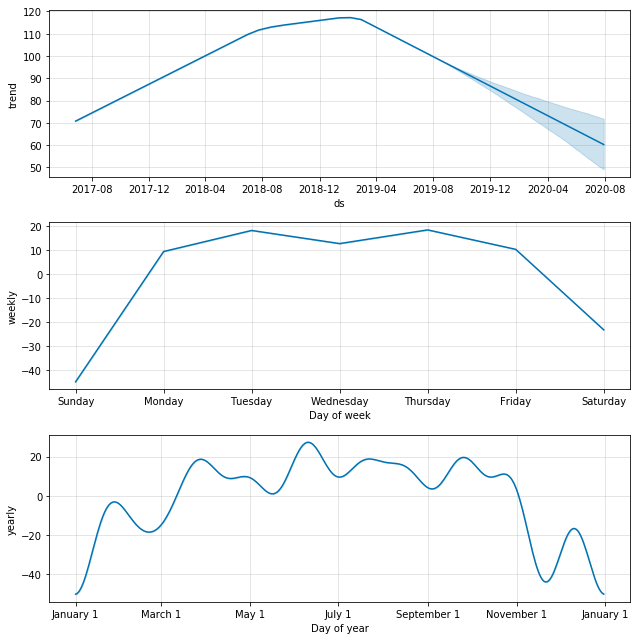

In [493]:
fig2 = m.plot_components(forecast)

This nicely captures the seasonal trend in ride numbers, where there is a drop-off in November-January.  It also shows the drop-off in rides on the weekend as compared to weekdays, indicating that commuters are the primary users.